In [25]:
# imports 
import os
import pandas as pd
import csv
import numpy as np
import nltk
from nltk.stem import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
import seaborn as sns

In [53]:
# Make sure you have the punkt tokenizer downloaded
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
# readng the data in a pandas dataframes for all three train, test and validaton
test_filename = 'test.csv'
train_filename = 'train.csv'
valid_filename = 'valid.csv'

train_news = pd.read_csv(train_filename)
test_news = pd.read_csv(test_filename)
valid_news = pd.read_csv(valid_filename)

In [9]:
train_news.shape # i have 10240 n_samples and 1 n_features , just the statments 

(10240, 2)

In [12]:
columns = list(train_news.columns)

In [14]:
columns # here i will need to encde the Label column , and i will do features extracion for the Statment column 

['Statement', 'Label']

In [18]:
train_news.Label.unique() # its a boolean field :) , perfect 

array([False,  True])

In [20]:
train_news.info() # statment is of type object because its a string . i will handle that 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  10240 non-null  object
 1   Label      10240 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 90.1+ KB


In [24]:
np.max([len(s) for s in train_news.Statement]), np.min([len(s) for s in train_news.Statement])# lengh in terms of number of characters 


(3145, 11)

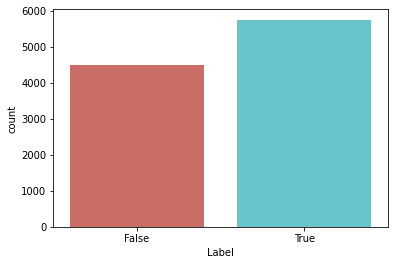

In [28]:
# let me check distribution of the labels 
sns.countplot(x='Label', data=train_news, palette='hls'); # almost balanced i will not oversample for this . 

In [33]:
# let me check for any missing data 
train_news.isnull().sum() # :) 

Statement    0
Label        0
dtype: int64

In [35]:

eng_stemmer = SnowballStemmer('english') # thisis my stemmer 


In [42]:
from typing import List,Optional

In [43]:
# i will have a function that stems the tokens  
def stem_tokens(tokens:List, stemmer = eng_stemmer) -> List:
    stemmed = []
    for token in tokens:
        stemmed.append(stemmer.stem(token))
    return stemmed


In [48]:
tokens = [ w.lower() for w in train_news['Statement'][0]]

In [51]:
stem_tokens(tokens) == tokens # this is not what i want 

True

In [56]:
# this is what i want 
text = "Hello, my name is Lewis. I like machine learning!"
tokens = word_tokenize(text)
stem_tokens(tokens)# this is the pipeline i want for preprocessing :) 


['hello',
 ',',
 'my',
 'name',
 'is',
 'lewi',
 '.',
 'i',
 'like',
 'machin',
 'learn',
 '!']

In [62]:
stem_tokens(word_tokenize(train_news['Statement'][0]))

['say',
 'the',
 'anni',
 'list',
 'polit',
 'group',
 'support',
 'third-trimest',
 'abort',
 'on',
 'demand',
 '.']

In [64]:
def process_data(data,exclude_stopword=True,stem=True):
    tokens = [w.lower() for w in data]
    tokens_stemmed = tokens
    tokens_stemmed = stem_tokens(tokens, eng_stemmer)
    tokens_stemmed = [w for w in tokens_stemmed if w not in stopwords ]
    return tokens_stemmed


In [ ]:
# you can look at diffrent methods of tokenization :) 
